#Продвинутый Python, ДЗ-3

Правила игры:

В домашке 8 задач, разбаловка указана в задании. Суммарно за дз можно получить 100 баллов, что равняется 10 баллам

Дедлайн - 7 дней после выдачи дз. Необходимо залить решеннный ноутбук в github и прислать ссылку в Anytask (без выполнения любого из пунктов работа проверяться не будет)

В данной домашке нужно рисовать графики с помощью matplotlib или же seaborn. Обратите внимание, что все графики и оси должны быть подписаны, графики должны выглядеть аккуратно (за это будем штрафовать)

## Данные

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут в файле archive.zip

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=36e6f80364abc80bf806b23dbf540141a4bc457aabdd096586315e26b6433ded
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import wget

url = 'https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip'
filename = wget.download(url)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./')

customers = pd.read_csv('olist_customers_dataset.csv')
location = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с португальского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем!

## Задание 1 (20 баллов)

Визуализируйте зависимость между средним числом покупок товара и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

Для подсчета среднего числа покупок нужно посчитать по каждому товару число продаж, а затем взять среднее от него (учтите, что мы считаем только доставленные заказы)

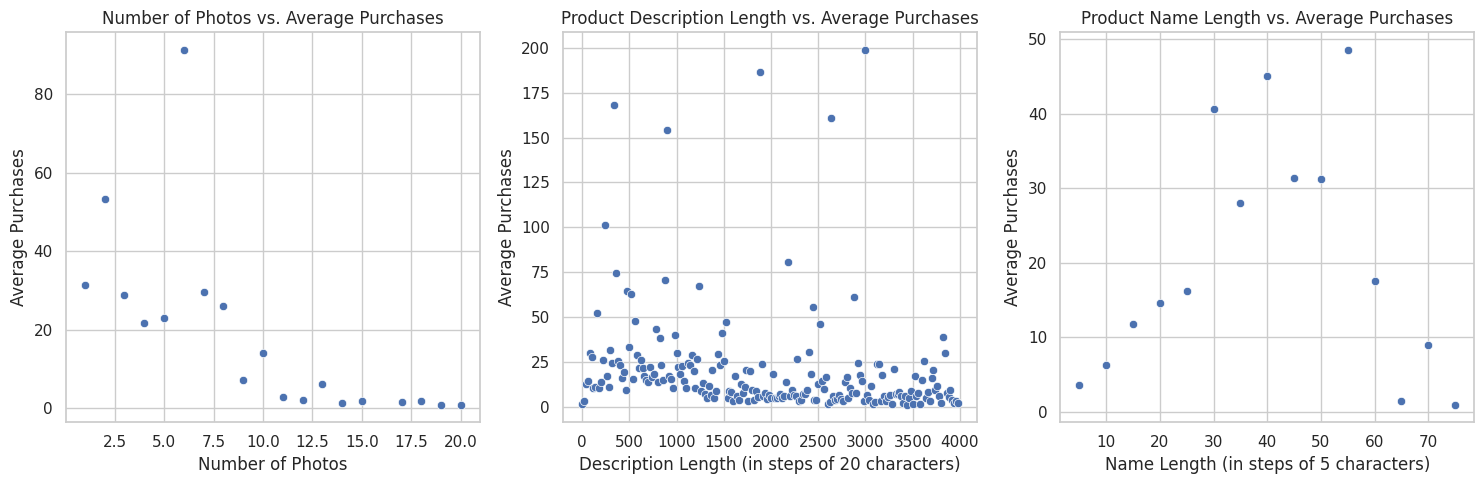

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

items_copy = items.copy(deep=True)
products_copy = products.copy(deep=True)
orders_copy = orders.copy(deep=True)

delivered_orders = orders_copy[orders_copy['order_status'] == 'delivered']
data = delivered_orders.merge(items_copy, on='order_id')
data = data.merge(products_copy, on='product_id')

product_purchases = data['product_id'].value_counts().reset_index()
product_purchases.columns = ['product_id', 'purchase_count']

data = data.merge(product_purchases, on='product_id')

data['product_description_length'] = (data['product_description_lenght'] // 20) * 20
data['product_name_length'] = (data['product_name_lenght'] // 5) * 5

description_dependency = data.groupby('product_description_length').agg({'purchase_count': 'mean'})
name_len_dependency = data.groupby('product_name_length').agg({'purchase_count': 'mean'})
photo_dependency = data.groupby('product_photos_qty').agg({'purchase_count': 'mean'})

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=photo_dependency.index, y=photo_dependency['purchase_count'], ax=axes[0])
axes[0].set_title('Number of Photos vs. Average Purchases')
axes[0].set_xlabel('Number of Photos')
axes[0].set_ylabel('Average Purchases')

sns.scatterplot(x=description_dependency.index, y=description_dependency['purchase_count'], ax=axes[1])
axes[1].set_title('Product Description Length vs. Average Purchases')
axes[1].set_xlabel('Description Length (in steps of 20 characters)')
axes[1].set_ylabel('Average Purchases')

sns.scatterplot(x=name_len_dependency.index, y=name_len_dependency['purchase_count'], ax=axes[2])
axes[2].set_title('Product Name Length vs. Average Purchases')
axes[2].set_xlabel('Name Length (in steps of 5 characters)')
axes[2].set_ylabel('Average Purchases')

plt.tight_layout()

plt.show()


## Задание 2 (10 баллов)

Отобразите среднюю сумму оплаты по типу оплаты (для этого вам нужна табличка payments)

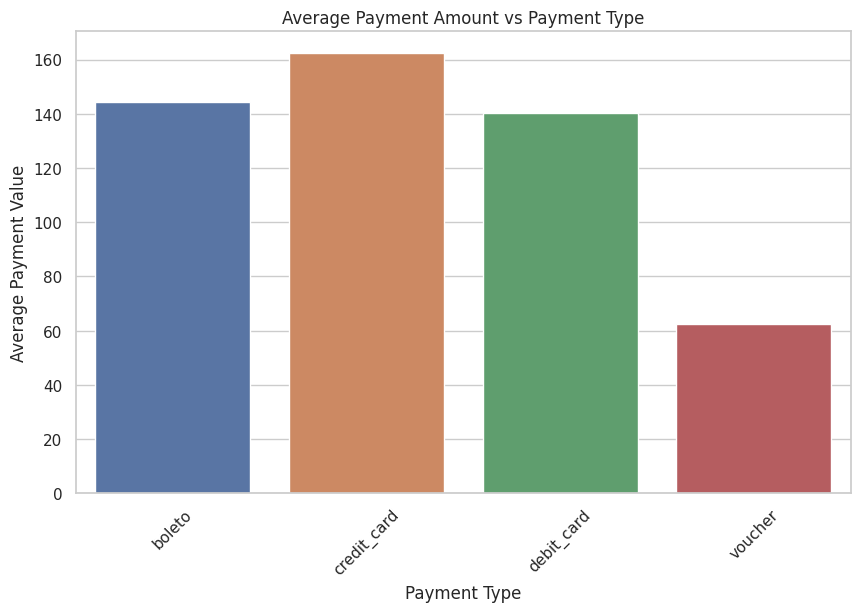

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

items_copy = items.copy(deep=True)
products_copy = products.copy(deep=True)
orders_copy = orders.copy(deep=True)
payments_copy = payments.copy(deep=True)

delivered_orders = orders_copy[orders_copy['order_status'] == 'delivered']
data=orders_copy.merge(delivered_orders,on='order_id')
data=data.merge(payments_copy,on='order_id')

payment_data = data.groupby(['payment_type'])['payment_value'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='payment_value', data=payment_data)
plt.title('Average Payment Amount vs Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Payment Value')
plt.xticks(rotation=45)
plt.show()



## Задание 3 (25 баллов)

Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть? (Обратите внимание, что в данных есть определенная бага, которую нужно расследовать и учесть)

Также покажите средний чек в зависимости от числа оплат. Есть ли какая-то связь между ними?

Для начала определим возможные баги, которые могут повлиять на рассчет

1) число платежей равно 0 или отрицательно (0 в случае delivered, отриц в целом)

2) NAn классический баг :)  (но в данном случае такого нет вроде)

3) Оплата больше или меньше суммы доставки и стоимости

4) Оплата есть, а заказ не доставлен (такие учитывать не стоит)



<ipython-input-51-4403698d5e1a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payments_copy['order_total'] = payments_copy['price'] + payments_copy['freight_value']
<ipython-input-51-4403698d5e1a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payments_copy['payment_diff'] = payments_copy['payment_value'] - payments_copy['order_total']
<ipython-input-51-4403698d5e1a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

0         0.000000e+00
1         0.000000e+00
2        -1.421085e-14
3         0.000000e+00
4         0.000000e+00
              ...     
117595    0.000000e+00
117596    0.000000e+00
117597    0.000000e+00
117599    0.000000e+00
117600    0.000000e+00
Name: payment_diff, Length: 115035, dtype: float64
0        -8.691375e+01
1         0.000000e+00
2        -1.421085e-14
3        -9.430750e+01
4        -6.422500e+01
              ...     
117595   -9.947000e+01
117596    0.000000e+00
117597   -4.840000e+01
117599   -2.956320e+02
117600    0.000000e+00
Name: payment_diff_parts, Length: 115035, dtype: float64


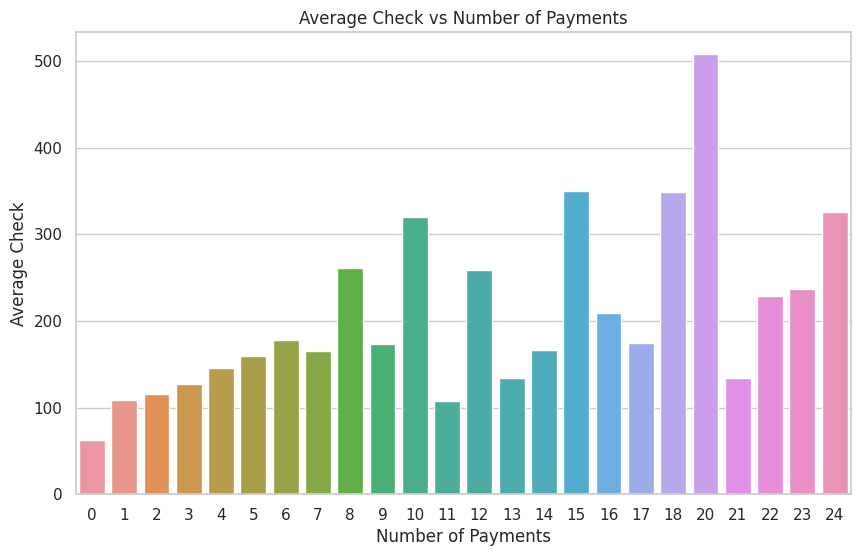

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns



payments_copy=payments.copy(deep=True)
location_copy=location.copy(deep=True)
orders_copy=orders.copy(deep=True)
customers_copy=customers.copy(deep=True)
items_copy=items.copy(deep=True)

payments_copy=payments_copy.merge(orders_copy, on='order_id')
payments_copy=payments_copy.merge(items_copy,on='order_id')
payments_copy=payments_copy[payments_copy['order_status']=='delivered']

payments_copy['order_total'] = payments_copy['price'] + payments_copy['freight_value']

payments_copy['payment_diff'] = payments_copy['payment_value'] - payments_copy['order_total']
payments_copy['payment_diff_parts']=payments_copy['payment_value']/payments_copy['payment_installments']-payments_copy['order_total']

print(payments_copy['payment_diff'])
print(payments_copy['payment_diff_parts'])


average_check_by_payments = payments_copy.groupby('payment_installments')['order_total'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_check_by_payments.index, y=average_check_by_payments.values)
plt.xlabel('Number of Payments')
plt.ylabel('Average Check')
plt.title('Average Check vs Number of Payments')
plt.show()



Итак, к результатам.

Из сравнения значений столбцов payment_diff и payment_diff_parts видно, что payment_diff намного ближе к общей цене покупки, а, значит, сумма оплаты более вероятно указана за всю покпку.

Теперь к графику: Видны скачки в тех значениях количества платежей, которые кратны 5 и кратны 6. Могу предположить, что это стандартные значения для расрочки (6,12,18... и 5,10,15...)

## Задание 4 (15 баллов)

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


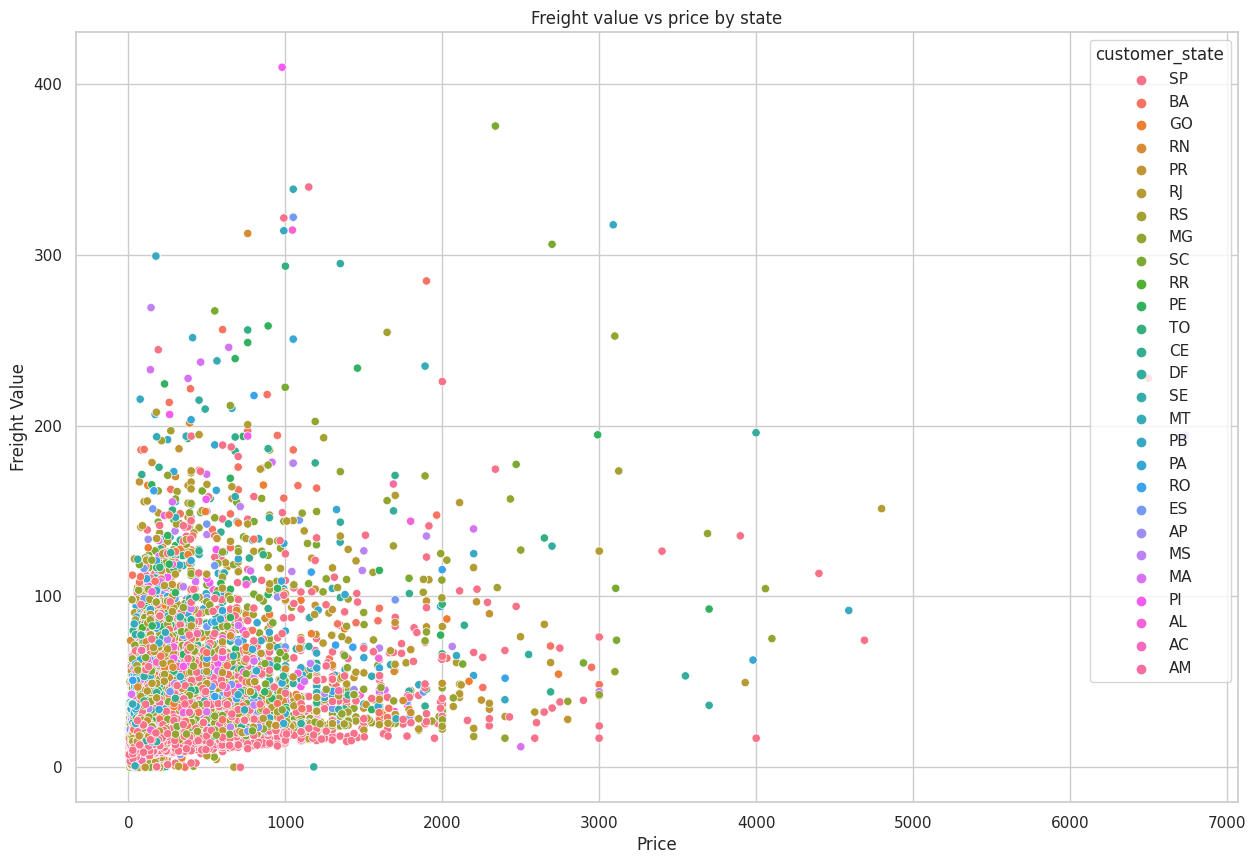

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns



payments_copy=payments.copy(deep=True)
location_copy=location.copy(deep=True)
orders_copy=orders.copy(deep=True)
customers_copy=customers.copy(deep=True)
items_copy=items.copy(deep=True)


delivered_orders = orders_copy[orders_copy['order_status'] == 'delivered']
data=delivered_orders.merge(customers_copy,on='customer_id')
data=data.merge(items_copy,on='order_id')

plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, x='price', y='freight_value', hue='customer_state')
plt.title('Freight value vs price by state')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.show()


В общем и целом, какой-то конкретной зависимости между ценой заказа и ценой доставки по штатам не наблюдается (точки полностью перемешаны между собой и нет каких-то концентричиских линий уровней или концентрических окружностей). Однако, можно заметить, что с ростом цены товара, растет и цена доставки. Причем по графику видно, что зависимость не более чем линейная (если провести прямые между точками одинакового цвета).

## Задание 5 (15 баллов)

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку? (оценки берутся из таблицы reviews)

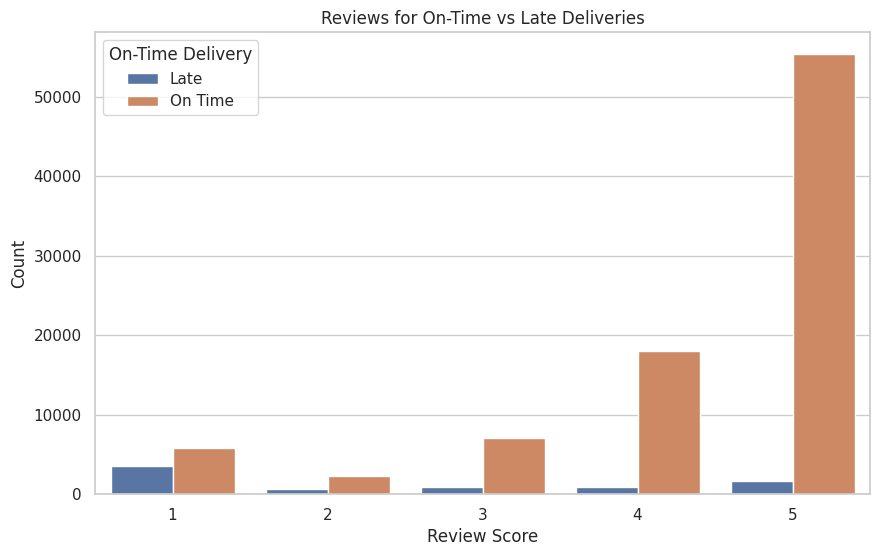

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

reviews_copy=reviews.copy(deep=True)
items_copy = items.copy(deep=True)
products_copy = products.copy(deep=True)
orders_copy = orders.copy(deep=True)
payments_copy = payments.copy(deep=True)


delivered_orders = orders_copy[orders_copy['order_status'] == 'delivered']
delivered_reviews = delivered_orders.merge(reviews_copy, on='order_id')
delivered_reviews['on_time_delivery'] = delivered_reviews['order_estimated_delivery_date'] >= delivered_reviews['order_delivered_customer_date']

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=delivered_reviews, x='review_score', hue='on_time_delivery')
plt.title('Reviews for On-Time vs Late Deliveries')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.legend(title='On-Time Delivery', labels=['Late', 'On Time'])
plt.show()



По графику довольно очевидно, что оценка очень сильно зависит от опоздания товара. Самая частая оценка без опоздания - 5, а при опоздании - 1.
Клиенту всегда хочется, чтобы товар прибывал в назначенное время :)

## Задание 6 (15 баллов)

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

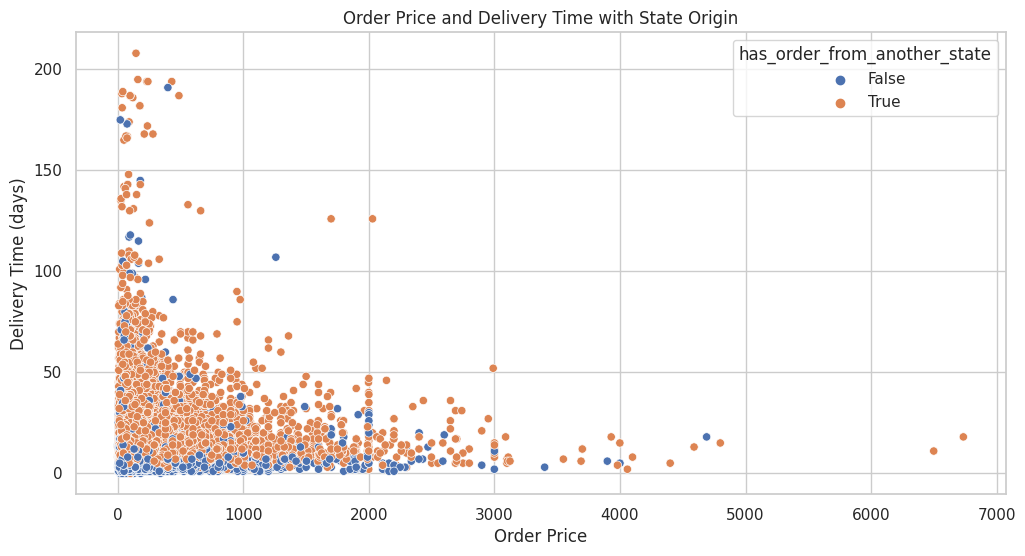

In [8]:
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

reviews_copy=reviews.copy(deep=True)
items_copy = items.copy(deep=True)
products_copy = products.copy(deep=True)
orders_copy = orders.copy(deep=True)
payments_copy = payments.copy(deep=True)
customers_copy=customers.copy(deep=True)
sellers_copy=sellers.copy(deep=True)

delivered_orders = orders_copy[orders_copy['order_status'] == 'delivered']
delivered_reviews = delivered_orders.merge(reviews_copy, on='order_id')
data=delivered_reviews.merge(customers_copy, on='customer_id')
data=data.merge(items_copy, on='order_id').merge(sellers_copy, on='seller_id')

data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['delivery_time_days'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days



data['has_order_from_another_state'] = data['customer_state'] != data['seller_state']


plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='price',
    y='delivery_time_days',
    hue='has_order_from_another_state',
)
plt.xlabel('Order Price')
plt.ylabel('Delivery Time (days)')
plt.title('Order Price and Delivery Time with State Origin')
plt.show()






График потверждает довольно очевидный факт - цена заказа и время ожидания выше, когда продавец и покупатель из разных штатов.